<a href="https://colab.research.google.com/github/GerardoMunoz/Vision/blob/main/image_manipulation/ORB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORB Feature Detection with OpenCV in Colab

This notebook demonstrates how to use **ORB (Oriented FAST and Rotated BRIEF)** in OpenCV to detect and match features between images.

In [1]:
# Install dependencies (if not already present)
!pip install opencv-python-headless matplotlib


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Function to load image from URL
def load_image_from_url(url, flags=cv2.IMREAD_COLOR):
    import urllib.request
    resp = urllib.request.urlopen(url)
    image_data = np.asarray(bytearray(resp.read()), dtype=np.uint8)
    img = cv2.imdecode(image_data, flags)
    return img


(np.float64(-0.5), np.float64(511.5), np.float64(479.5), np.float64(-0.5))

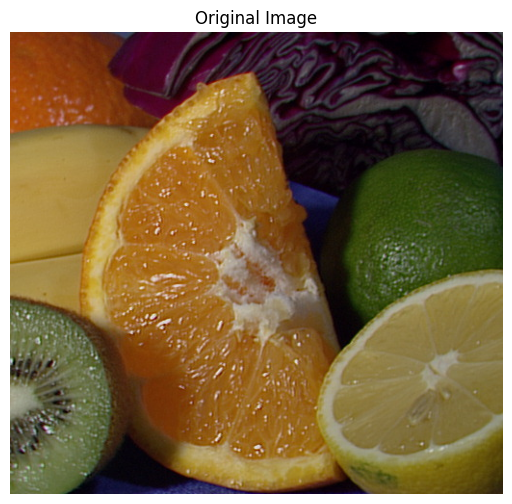

In [4]:
# Load the sample image (fruits) from the URL
url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/fruits.jpg"
img_bgr = load_image_from_url(url)
if img_bgr is None:
    raise RuntimeError("Failed to load image from URL")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,6))
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')


## ORB Keypoint Detection

Detected 500 keypoints.


(np.float64(-0.5), np.float64(511.5), np.float64(479.5), np.float64(-0.5))

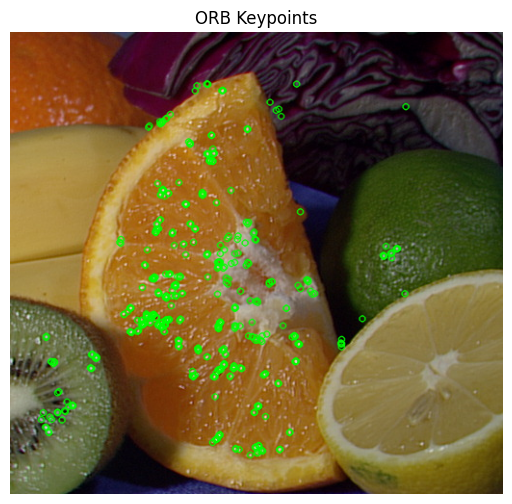

In [5]:
# Create ORB detector
orb = cv2.ORB_create(nfeatures=500)

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(img_bgr, None)

print(f"Detected {len(keypoints)} keypoints.")

# Draw keypoints on the image
img_with_kp = cv2.drawKeypoints(img_rgb, keypoints, None, color=(0,255,0), flags=0)

plt.figure(figsize=(8,6))
plt.title('ORB Keypoints')
plt.imshow(img_with_kp)
plt.axis('off')


## Matching Between Two Images (e.g. original and rotated)

Rotated image: detected 500 keypoints.
Found 354 matches.


(np.float64(-0.5), np.float64(1023.5), np.float64(479.5), np.float64(-0.5))

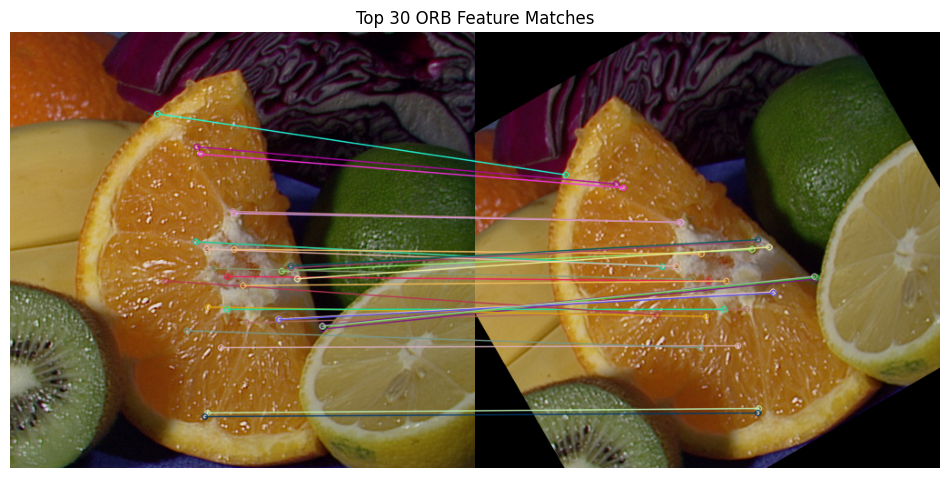

In [6]:
# Create a rotated version of the image for matching example
angle = 30  # degrees
h, w = img_bgr.shape[:2]
center = (w//2, h//2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
img_rot = cv2.warpAffine(img_bgr, M, (w, h))

# Detect keypoints & descriptors on rotated image
kp2, des2 = orb.detectAndCompute(img_rot, None)
print(f"Rotated image: detected {len(kp2)} keypoints.")

# Match descriptors using BFMatcher (Hamming distance)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors, des2)
matches = sorted(matches, key=lambda x: x.distance)

print(f"Found {len(matches)} matches.")

# Draw top matches
img_matches = cv2.drawMatches(img_rgb, keypoints, cv2.cvtColor(img_rot, cv2.COLOR_BGR2RGB), kp2,
                              matches[:30], None, flags=2)

plt.figure(figsize=(12,6))
plt.title('Top 30 ORB Feature Matches')
plt.imshow(img_matches)
plt.axis('off')


## Discussion & Next Steps

- ORB is efficient and rotation invariant (to some degree)
- Matches may not always be perfect, you could filter by distance or ratio test
- You can try images under different lighting, scales, etc.
- For more robust matching, explore **FLANN** matcher or RANSAC-based homography filtering